<a href="https://colab.research.google.com/github/bigboivan/MAT422/blob/main/HW7_MAT422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 7 - Ivan Matyushov
Section 3.2 Homework
Below is a display of finding the limits of a function along with extrema of datasets. We look at finding both global and local minima where the global is the absolute minima that is lower than every other point for every x input of the function/dataset. Local extrema are points where a horizontal slope can be made to indicate a local min/max. These are not always the 'lowest' or 'highest' points of the datasets.

The limit of the function as x approaches 1 is: 2
[0.32242104 0.64302414 0.06368946 0.77307288 0.56457834 0.07082401
 0.91251229 0.4105987  0.84944155 0.42263382 0.54923295 0.06706569]
The inidices of the local maxima of the dataset are:  (array([ 1,  3,  6,  8, 10]),)
The indices of the local minima of the dataset are:  (array([2, 5, 7, 9]),)
The global maximum of the dataset is:  0.9125122871620569
The global maximum of the dataset is:  0.06368946180129886


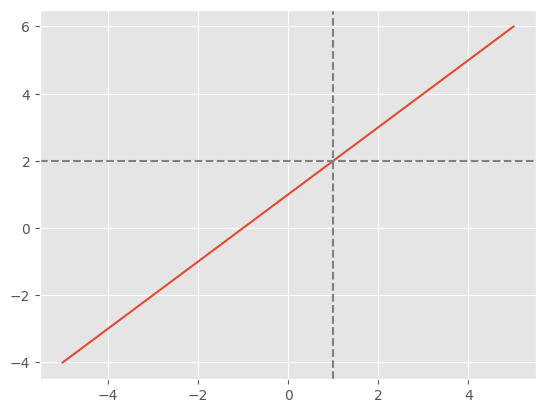

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import Limit, Symbol
from scipy.signal import argrelextrema
import sympy as sp #allows performing symbolic math

# Section 3.2.1 - Limits and Continuity

# define the function
x = Symbol('x')
f = (x**2 - 1)/(x - 1)

# calculate the limit as x approaches 1
limit = Limit(f, x, 1).doit()

print("The limit of the function as x approaches 1 is:", limit)

# Plot of function
x_vals = np.linspace(-5, 5, 1000)
y_vals = [f.subs(x, x_val) for x_val in x_vals]

fig, ax = plt.subplots()
ax.plot(x_vals, y_vals)
ax.axvline(x=1, color='gray', linestyle='--')
ax.axhline(y=limit, color='gray', linestyle='--')

#For finding local mins and maxes
x = np.random.random(12) #generate random set of numbers
print(x)

local_max = argrelextrema(x, np.greater)
print("The inidices of the local maxima of the dataset are: ", local_max)

local_min = argrelextrema(x, np.less)
print("The indices of the local minima of the dataset are: ", local_min)

#These functions find global max/min of dataset
x_max = max(x)
print("The global maximum of the dataset is: ", x_max)

x_min = min(x)
print("The global maximum of the dataset is: ", x_min)



Here I display code for symbolically taking the first & second derivatives of a function. Next, I perform a numeric derivative where I show the result of taking the derivative between successive points of a dataset.

Lastly, the derivative graphically can give local slopes along a dataset. The Mean value theorem states that there is at least one tangent in a plot that is parallel to the secant through its endpoints. I shwocase this graphcailly and show how local slopes of a point can create tangents of a line representing local slopes.

2*x + 2
2


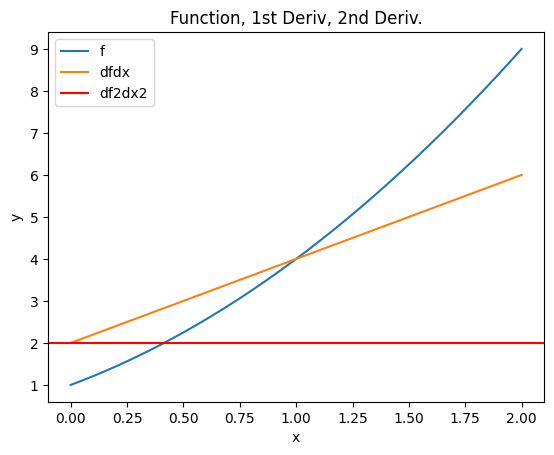

[2.  2.5 2.  1. ]


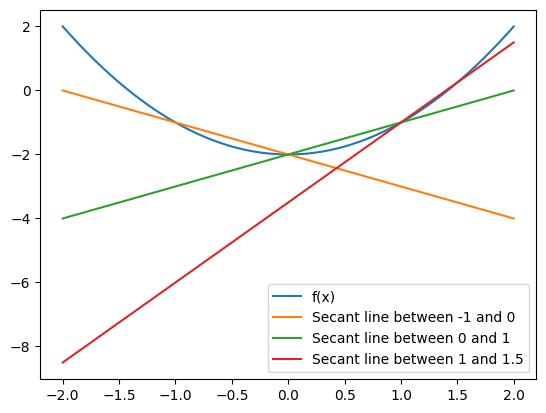

In [22]:
# Section 3.2.2 - Derivatives

x = sp.Symbol('x')
f = x**2 + 2*x + 1 # x^2 + 2x + 1

dfdx = sp.diff(f, x) # Calculate the derivative sybolically
df2dx2 = sp.diff(dfdx, x)

print(dfdx) #Prints 2x + 2
print(df2dx2) #Prints 2; gives 2nd derivative

# Plots of original, first derivative, and second derivative functions
x2 = np.linspace(0,2, 200)
f2 = x2**2 + 2*x2 + 1
dfdx_x2 = 2*x2 + 2
df2dx2_2 = 2


plt.plot(x2, f2, label='f')
plt.plot(x2, dfdx_x2, label='dfdx')
plt.axhline(y=df2dx2_2, color='r', linestyle='-', label='df2dx2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function, 1st Deriv, 2nd Deriv.')
plt.legend(fontsize='medium')
plt.show()
#Numerical derivation:
x1 = np.array([1, 2, 3, 4])
y1 = np.array([2, 4, 7, 8])

dydx = np.gradient(y1, x1) #takes numerical derivative of dataset at each datapoint

print(dydx)


def f(x):
    return x**2 - 2

def secant_line(x1, x2):
    m = (f(x2) - f(x1)) / (x2 - x1) # Mean value theorem
    b = f(x1) - m * x1
    return m, b

x = np.linspace(-2, 2, 100)
y = f(x)

plt.plot(x, y, label='f(x)')

points = [-1, 0, 1, 1.5]

for i in range(len(points) - 1):
    x1, x2 = points[i], points[i + 1]
    m, b = secant_line(x1, x2)
    plt.plot(x, m * x + b, label=f'Secant line between {x1} and {x2}')

plt.legend()
plt.show()




Taylor's Theorem provides a way to approximate a smooth function around a specific point using polynomials. It expresses a function as the sum of its derivatives at a point, scaled by powers of the difference between the input and that point. This approximation becomes more accurate as you include more terms. A Taylor series is a way to develop an estimate of a function f(x). Below I took a sin function and developed a three order taylor series function that estimates the function.

In [31]:
# Section 3.2.3 - Taylor's Theorem
from sympy.functions import sin,cos
plt.style.use("ggplot")

# Define the variable and the function to approximate
x = sym.Symbol('x')
f = sin(x)

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    i = 0
    m = 0
    while i <= n:
        m = m + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return m

taylor_f = taylor(f, 1, 3)
print(taylor_f)

-(x - 1)**3*cos(1)/6 - (x - 1)**2*sin(1)/2 + (x - 1)*cos(1) + sin(1)
